In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
import joblib


In [3]:
#Load the Dataset

# Load the dataset
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# Display the first few rows
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
#Data Preprocessing

# Convert 'date_time' to datetime object
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract temporal features
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month

# Create a binary feature for rush hours (7-9 AM and 4-6 PM)
df['rush_hour'] = df['hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 18) else 0)

# Map weather descriptions to numerical categories
weather_mapping = {desc: idx for idx, desc in enumerate(df['weather_description'].unique())}
df['weather_desc_code'] = df['weather_description'].map(weather_mapping)

# Drop columns that won't be used
df.drop(['date_time', 'weather_description'], axis=1, inplace=True)


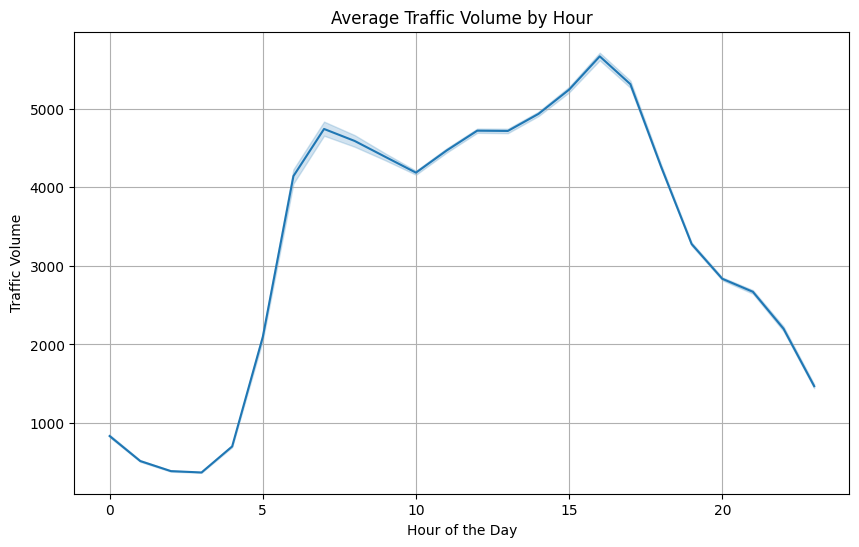

In [5]:
# Exploratory Data Analysis (EDA)
#Traffic Volume by Hour

plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='traffic_volume', data=df)
plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()


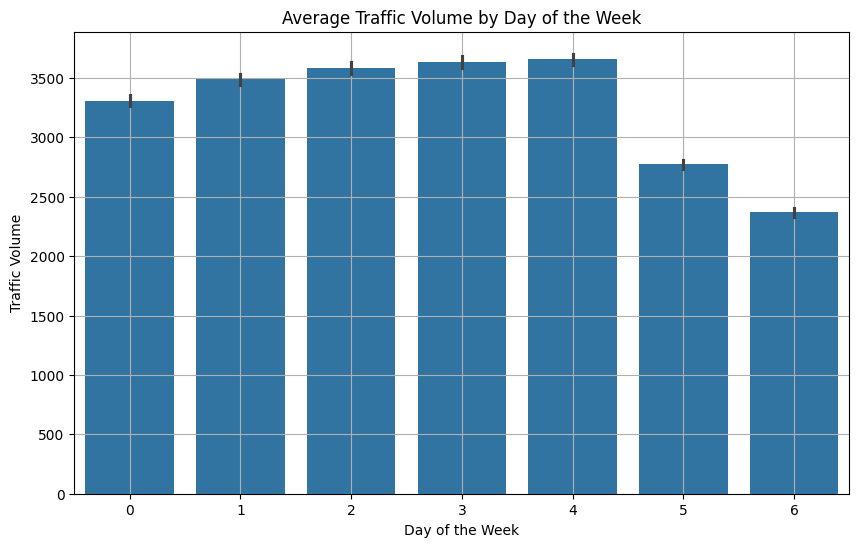

In [6]:
#Traffic Volume by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='traffic_volume', data=df)
plt.title('Average Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()


In [7]:
#Prepare Features and Target Variable

# Define features and target
features = ['hour', 'day_of_week', 'month', 'rush_hour', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_desc_code']
target = 'traffic_volume'

X = df[features]
y = df[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
#Train the Model

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:
# Model Evaluation

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')


Root Mean Squared Error (RMSE): 445.71
Mean Absolute Error (MAE): 246.71


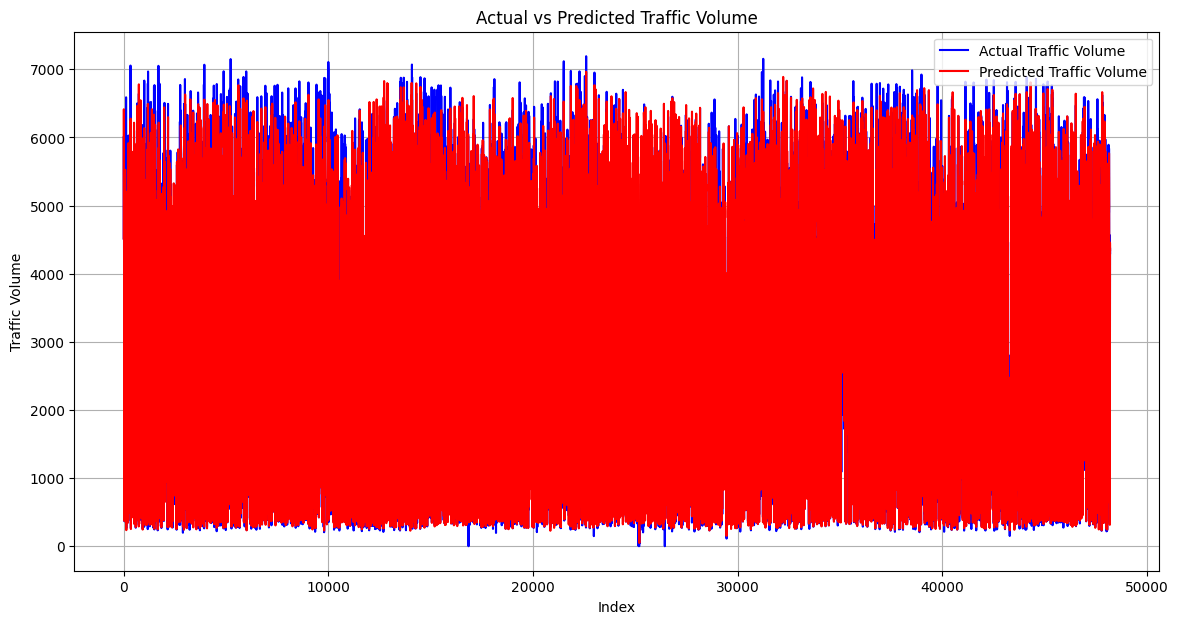

In [10]:
#Visualize Predictions

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df = comparison_df.sort_index()

# Plot actual vs predicted traffic volume
plt.figure(figsize=(14, 7))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual Traffic Volume', color='blue')
plt.plot(comparison_df.index, comparison_df['Predicted'], label='Predicted Traffic Volume', color='red')
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Index')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()
